In [287]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller

In [288]:
!pip install pmdarima
from pmdarima import auto_arima  
std=StandardScaler()

In [379]:
covid = pd.read_csv("covid_19_data.csv")
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [380]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (306429, 8)
Checking for null values SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [381]:
#Dropping the column
covid.drop(["SNo"],1,inplace=True)

In [382]:
covid.isnull().sum()

ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [383]:
covid.dropna(inplace=True,axis=0)
covid.isnull().sum()


ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [384]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])
Covid=covid[covid['Country/Region']== 'Australia']
Covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
275,2020-01-27,New South Wales,Australia,1/27/20 23:59,4.0,0.0,0.0
276,2020-01-27,Victoria,Australia,1/27/20 23:59,1.0,0.0,0.0
328,2020-01-28,New South Wales,Australia,1/28/20 23:00,4.0,0.0,0.0
329,2020-01-28,Victoria,Australia,1/28/20 23:00,1.0,0.0,0.0
382,2020-01-29,New South Wales,Australia,1/29/20 19:30,4.0,0.0,0.0


In [385]:
#Grouping differnent types of cases as per the date
datewise = Covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [386]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])

Basic Information
Total number of Confirmed cases around the world 30096.0
Total number of Recovered cases around the world 23579.0
Total number of Death cases around the world 910.0


In [387]:
#Data Anlaysis for Aus
Aus_data = covid[covid["Country/Region"]=="Australia"]
datewise_Australia = Aus_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_Australia.iloc[-1])
print("Total Active Cases",datewise_Australia["Confirmed"].iloc[-1]-datewise_Australia["Recovered"].iloc[-1]-datewise_Australia["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_Australia["Recovered"].iloc[-1]+datewise_Australia["Deaths"].iloc[-1])

Confirmed    30096.0
Recovered    23579.0
Deaths         910.0
Name: 2021-05-29 00:00:00, dtype: float64
Total Active Cases 5607.0
Total Closed Cases 24489.0


In [388]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=datewise_Australia["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=datewise_Australia["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_Australia.index, y=datewise_Australia["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Visualization of confirmed, recovered and death cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [299]:
#Grouping different types of cases as per the date
datewise=Aus_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["ObservationDate"]=datewise.index-datewise.index.min()

In [300]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)

In [301]:
datewise["ObservationDate"]=datewise.index-datewise.index[0]
datewise["ObservationDate"]=datewise["ObservationDate"].dt.days

In [302]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [303]:
lin_reg=LinearRegression(normalize=True)


In [304]:
lin_reg.fit(np.array(train_ml["ObservationDate"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(normalize=True)

In [305]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["ObservationDate"]).reshape(-1,1))

In [306]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
from sklearn.metrics import r2_score

Root Mean Square Error for Linear Regression:  7924.254457480753


In [307]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["ObservationDate"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [308]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [309]:
poly = PolynomialFeatures(degree = 8)

In [310]:
train_poly=poly.fit_transform(np.array(train_ml["ObservationDate"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["ObservationDate"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [311]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [312]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  15956.54606516541


In [313]:
comp_data=poly.fit_transform(np.array(datewise["ObservationDate"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))

<Figure size 792x432 with 0 Axes>

In [314]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [315]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

In [316]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  185.36461850546104


AUTO REGRESSIVE MODEL (AUTO ARIMA)

In [317]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [318]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4966.127, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4858.111, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4773.076, Time=0.26 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4773.853, Time=0.30 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=4775.651, Time=0.43 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0] intercept
Total fit time: 1.114 seconds


ARIMA(order=(2, 2, 0), scoring_args={}, suppress_warnings=True)

In [319]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [320]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  78.48727041144184


In [321]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

ARIMA Model (using AUTOARIMA)

In [322]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [323]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4966.127, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4807.749, Time=0.26 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=4787.927, Time=0.39 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=4712.599, Time=0.40 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4858.111, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4801.651, Time=0.26 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=4715.854, Time=0.57 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=4703.498, Time=0.84 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4773.076, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=4774.006, Time=0.31 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=4745.627, Time=0.39 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=4704.589, Time=1.18 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4773.853, Time=0.25 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=4774.679, Time=0.77 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=4707.464, Time=1.17 sec

Best mode

ARIMA(order=(1, 2, 3), scoring_args={}, suppress_warnings=True)

In [324]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [325]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  93.51727779665792


In [326]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

SARIMA Model (using AUTOARIMA

In [327]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=4962.839, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=4964.127, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=4855.207, Time=0.14 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=4807.674, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=4805.750, Time=0.07 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=4807.669, Time=0.15 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=4809.609, Time=0.57 sec
 ARIMA(1,2,1)(0,0,0)[7]             : AIC=4799.652, Time=0.10 sec
 ARIMA(1,2,1)(1,0,0)[7]             : AIC=4801.602, Time=0.28 sec
 ARIMA(1,2,1)(0,0,1)[7]             : AIC=4801.605, Time=0.29 sec
 ARIMA(1,2,1)(1,0,1)[7]             : AIC=4803.528, Time=0.57 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=4856.112, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[7]             : AIC=4772.007, Time=0.12 sec
 ARIMA(2,2,1)(1,0,0)[7]             : AIC=4774.005, Time=0.36 sec
 ARIMA(2,2,1)(0,0,1)[7]          

ARIMA(order=(2, 2, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [328]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [329]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  74.08185810673814


In [330]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [354]:
train_size = int(len(Co) * 0.8)
test_size = len(Co) - train_size
train, test = Co.iloc[0:train_size], Co.iloc[train_size:len(Co)]
print(train.shape, test.shape)

(3030, 2) (758, 2)


In [355]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(np.array(train['Deaths']).reshape(-1,1))

train['Deaths'] = scaler.transform(np.array(train['Deaths']).reshape(-1,1))
test['Deaths'] = scaler.transform(np.array(test['Deaths']).reshape(-1,1))

In [356]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [357]:
TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train[['Deaths']], train.Deaths, TIME_STEPS)
X_test, y_test = create_dataset(test[['Deaths']], test.Deaths, TIME_STEPS)

print(X_train.shape)

(3000, 30, 1)


In [359]:
X_train[2999]

array([[-0.286674  ],
       [-0.29727284],
       [-0.24957808],
       [ 4.02705187],
       [-0.27077575],
       [-0.30257226],
       [-0.03230196],
       [-0.31847051],
       [-0.286674  ],
       [-0.29727284],
       [-0.24957808],
       [ 4.02705187],
       [-0.27077575],
       [-0.30257226],
       [-0.03230196],
       [-0.31847051],
       [-0.286674  ],
       [-0.29727284],
       [-0.24957808],
       [ 4.02705187],
       [-0.27077575],
       [-0.30257226],
       [-0.03230196],
       [-0.31847051],
       [-0.286674  ],
       [-0.29727284],
       [-0.24957808],
       [ 4.02705187],
       [-0.27077575],
       [-0.30257226]])

In [361]:
np.random.seed(21)
tf.random.set_seed(21)

In [360]:
import tensorflow as tf
from tensorflow import keras

In [362]:
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 repeat_vector_7 (RepeatVect  (None, 30, 128)          0         
 or)                                                             
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           131584    
                                                                 
 dropout_16 (Dropout)        (None, 30, 128)           0         
                                                                 
 time_distributed_7 (TimeDis  (None, 30, 1)            129       
 tributed)                                            

In [363]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/10
85/85 [==============================] - 12s 87ms/step - loss: 0.8275 - val_loss: 2.0339
Epoch 2/10
85/85 [==============================] - 6s 75ms/step - loss: 0.8363 - val_loss: 2.0330
Epoch 3/10
85/85 [==============================] - 6s 76ms/step - loss: 0.8247 - val_loss: 2.0333
Epoch 4/10
85/85 [==============================] - 6s 75ms/step - loss: 0.8207 - val_loss: 2.0333
Epoch 5/10
85/85 [==============================] - 6s 76ms/step - loss: 0.8203 - val_loss: 2.0339
Epoch 6/10
85/85 [==============================] - 6s 76ms/step - loss: 0.8201 - val_loss: 2.0330
Epoch 7/10
85/85 [==============================] - 6s 75ms/step - loss: 0.8379 - val_loss: 2.0338
Epoch 8/10
85/85 [==============================] - 6s 76ms/step - loss: 0.8308 - val_loss: 2.0345
Epoch 9/10
85/85 [==============================] - 6s 76ms/step - loss: 0.8216 - val_loss: 2.0321
Epoch 10/10
85/85 [==============================] - 6s 75ms/step - loss: 0.8202 - val_loss: 2.0318


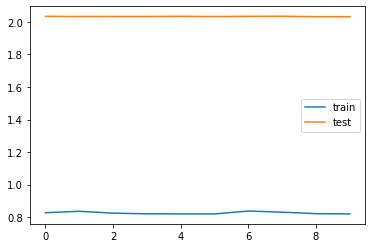

In [364]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [365]:
X_train_pred = model.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

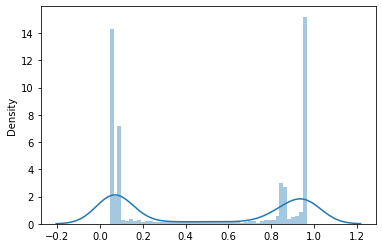

In [366]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [367]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [368]:
THRESHOLD = 0.65

test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['Deaths'] = test[TIME_STEPS:].Deaths

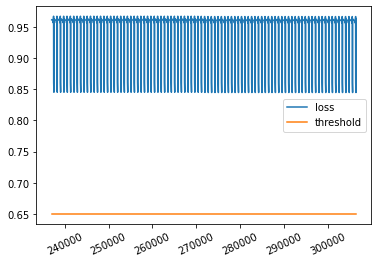

In [369]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [370]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,loss,threshold,anomaly,Deaths
237029,0.961327,0.65,True,-0.302572
237334,0.959937,0.65,True,-0.032302
237351,0.956780,0.65,True,-0.318471
237406,0.961771,0.65,True,-0.286674
237467,0.967097,0.65,True,-0.297273
